<h2> Combining Simulations and Value-at-Risk </h2>

/var/folders/vw/nq14zj9x7pq7w3w49n_1v_n40000gn/T/ipykernel_60724/202353750.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  var_results_df = pd.concat([var_results_df, result_row], ignore_index=True)


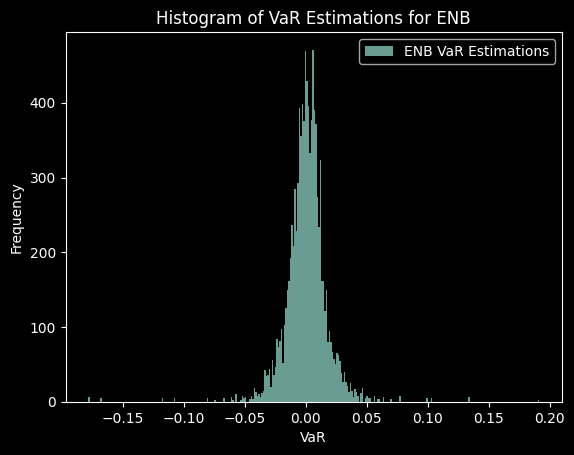

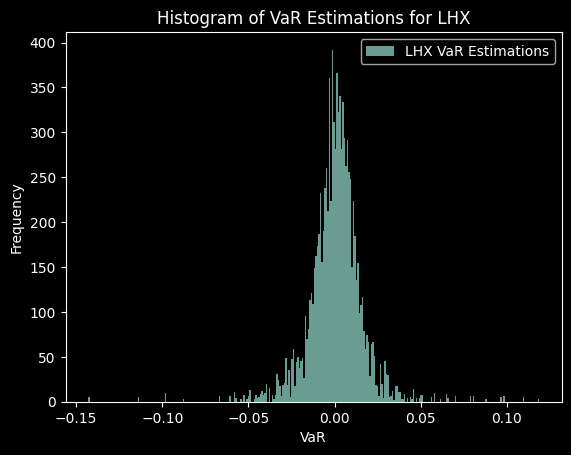

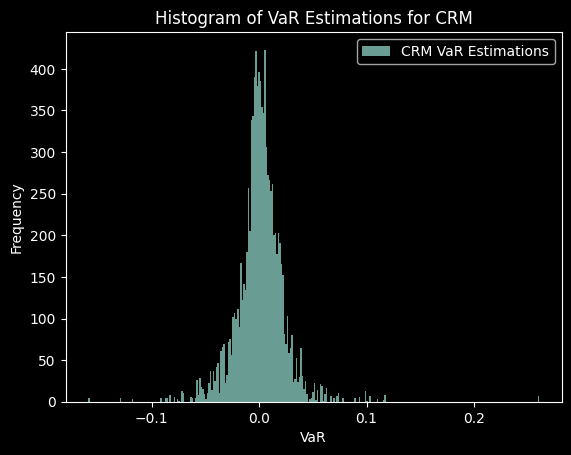

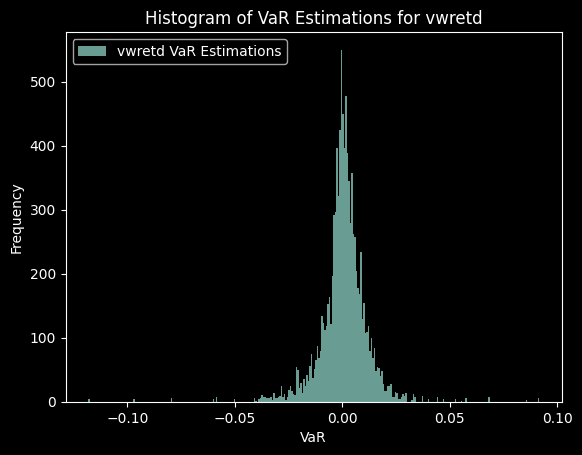

             VaR  95% CI Lower  95% CI Upper
Stock                                       
ENB    -0.024070     -0.031313      0.032332
LHX    -0.024045     -0.031932      0.030423
CRM    -0.034462     -0.044576      0.041704
vwretd -0.016971     -0.023200      0.020888


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def simulate_var_and_confidence_intervals(returns, seed=42):
    np.random.seed(seed)
    bootstrap_samples = np.random.choice(returns, size=(10000), replace=True)
    var_5_percentile = np.percentile(bootstrap_samples, 5)
    ci_lower = np.percentile(bootstrap_samples, 2.5)
    ci_upper = np.percentile(bootstrap_samples, 97.5)
    return var_5_percentile, ci_lower, ci_upper, bootstrap_samples

returns_data = pd.read_csv('Data/Stocks and Market Returns.csv', index_col=0, parse_dates=True)
stocks = returns_data[['ENB', 'LHX', 'CRM', 'vwretd']]

var_results_df = pd.DataFrame(columns=['Stock', 'VaR', '95% CI Lower', '95% CI Upper'])

for stock in stocks:
    returns = stocks[stock].dropna()
    var_5_percentile, ci_lower, ci_upper, samples = simulate_var_and_confidence_intervals(returns)
    
    result_row = pd.DataFrame({
        'Stock': [stock], 
        'VaR': [var_5_percentile], 
        '95% CI Lower': [ci_lower], 
        '95% CI Upper': [ci_upper]
    })

    # Drop empty or all-NA columns from the result_row DataFrame
    result_row = result_row.dropna(axis=1, how='all')

    # Concatenate the result_row DataFrame with the var_results_df DataFrame
    var_results_df = pd.concat([var_results_df, result_row], ignore_index=True)

    plt.hist(samples, bins=300, alpha=0.75, label=f'{stock} VaR Estimations')
    plt.title(f'Histogram of VaR Estimations for {stock}')
    plt.xlabel('VaR')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

print(var_results_df.set_index('Stock'))